# Nonlinear equations II

## Outline
* Fixed point iteration
* Secant method
* Newton's method


## Comments
* Focusing on 1 equation and 1 unknown here.
* Methods only require information at one point.
    * Termed "open" methods
    * Unlike the closed (bracketing) methods that required two initial points.
* Methods may converge faster.
* Methods may diverge (the tradeoff).
* Often used to refine a root from a slower method like bisection.

## Fixed point method
* Very common
* Very simple
* Rewrite $f(x)=0$ as $x=g(x)$.
    * Can always do this: just add $x$ to both sides. 
        * But there is often more than one way to do this, and the approch used may affect stability, as shown below.
* Iteration:
<font color='blue'>$$x_{k+1} = g(x_k)$$</font>
    * That is: guess $x_0$.
    * Evaluate $g(x_0)$.
    * The result is $x_1$.
    * Repeat.


Geometrically $x_{k+1} = g(x_k)$ finds the intersection of the $y=g(x)$ and $y=x$ lines.

<img src="https://ignite.byu.edu/che541/lectures/figs/l09f01.png" width="300">

* Convergence depends on:
    1. Initial guess
    2. Form chosen for $g(x)$.


* **Example**
$$ f(x) = x^2-x-2$$

* Roots at $x=2$, $x=-1$.
* Several forms, different behavior:
    * Add $x$ to both sides of $f(x)=0$: $$x = x^2-2 = g(x).$$
    * Add $x+2$ to both sides of $f(x)=0$, and divide the result by $x$: $$x=1+\frac{2}{x} = g(x).$$
    * Add $x+2$ to both sides and then take the square root: $$x = \sqrt{x+2} = g(x).$$
    * Add $x^2+2$ then divide by $(2x-1)$: $$x = \frac{x^2+2}{2x-1} = g(x).$$

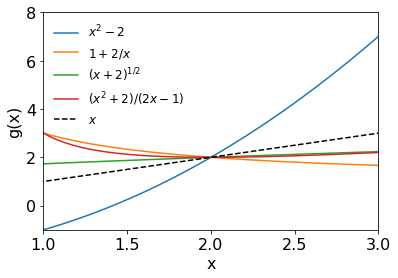

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-2,3,100)
y1 = x**2 - 2.0
y2 = 1.0+2./x
y3 = (x+2.)**0.5
y4 = (x**2 + 2)/(2*x -1)
plt.rc("font", size=16) 
plt.plot(x,y1,label=r'$x^2-2$')
plt.plot(x,y2,label=r'$1+2/x$')
plt.plot(x,y3,label=r'$(x+2)^{1/2}$')
plt.plot(x,y4,label=r'$(x^2+2)/(2x-1)$')
plt.plot(x,x,'k--',label=r'$x$')
plt.legend(loc='upper left', frameon=False, fontsize=12)
plt.ylim([-1,8]); #   plt.ylim([-3,8])
plt.xlim([1,3]);  #   plt.xlim([-2,3])
plt.xlabel('x')
plt.ylabel('g(x)');

### Fixed point example 1
* Solve $x=g(x)$ for $g(x) = (x+2)^{1/2}$.

In [2]:
import numpy as np

def FP(g, x, tol=1E-5, maxit=1000):
    
    for niters in range(1,maxit+1):
        
        xnew = g(x)
        err = np.linalg.norm(xnew-x)/np.linalg.norm(x)
        if err <= tol:
            return xnew, niters
        
        x = xnew
        
    print(f"Warning no converged in {maxit} iterations")
    return xnew, niters
        
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    

In [15]:
def FP(g, x, tol=1E-5, maxit=1000):
    
    for niter in range(1,maxit+1):
        xnew = g(x)
        if np.linalg.norm(xnew-x)/np.linalg.norm(x) <=tol:
            return xnew, niter 
        x = xnew
        
    print('warning, reached maxit =', maxit)
    return x, niter

#-----------

def g(x):
    return np.sqrt(x+2)

#-----------

xguess = 4.0
x, nit = FP(g, xguess)
print("x, nit = ", x, nit)

x, nit =  2.000006616131052 9


## Fixed point example 2
* Fluid mechanics, turbulent pipe flow
* Given $\Delta P$, $D$, $L$, $\epsilon/D$, $\rho$, $\mu$.
* Find the velocity in the pipe.

Equations:

$$ Re = \frac{\rho Dv}{\mu}.$$

$$ \frac{1}{\sqrt{f}} = -\log_{10}\left(\frac{\epsilon/D}{3.7} + \frac{2.51}{Re\sqrt{f}}\right),$$

$$ \frac{\Delta P}{\rho} = \frac{fLv^2}{2D} \rightarrow  v = \sqrt{\frac{2D\Delta P}{\rho f L}}.$$

Approach:
* Let unknowns be $v$ and $\hat{f}\equiv 1/\sqrt{f}$.
* Guess $v_0$ and $\hat{f}_0$
* Solve for $Re$ from the first equation above.
* Solve for $\hat{f}$
* Solve the third equation above for $v$.
* Repeat.

Note, this calls ```FP``` from example 1

In [16]:
import numpy as np

#-------------------

def g_fluids(vfhat):
    
    v    = vfhat[0]
    fhat = vfhat[1]

    ρ = 1000    # kg/m3
    μ  = 1E-3    # Pa*s = kg/m*s
    D   = 0.1     # m
    L   = 100     # m
    ϵ = D/100   # m
    ΔP  = 101325  # Pa
    
    Re = ρ*D*v/μ
    fhat = -np.log10(ϵ/D/3.7 + 2.51*fhat/Re)
    v = np.sqrt(2*D*ΔP/ρ/L)*fhat
    
    return np.array([v, fhat])

#-------------------

vfhat_g = np.array([1.0, 0.1])
vfhat, nit = FP(g_fluids, vfhat_g)
print(f"v = {vfhat[0]:.4f} (m/s)")
print(f"f = {1/vfhat[1]**2:.4f}")
print(f"# iterations = {nit}")

v = 1.1521 (m/s)
f = 0.1527
# iterations = 3


### Convergence
* For convergence, need the $|\mbox{slope}|<1.$
    * $x_{k+1} = g(x_k)$
    * At convergence, we have $x=g(x)$. 
    * Subtract these two: $x_{k+1}-x = \epsilon_{k+1} = g(x_k)-g(x)$
    * Now, expand g as a Taylor series: $g(x) = g(x_k) + g^{\prime}(\xi)(x-x_k)$, where $x\le\xi\le x_k$
    * Hence, $\epsilon_{k+1} = -g^{\prime}(\xi)(x-x_k) = g^{\prime}(\xi)\epsilon_k$
    * So, $$\frac{\epsilon_{k+1}}{\epsilon_k} = g^{\prime}(\xi).$$
    * For convergence, we need <font color='blue'>$$\left|\frac{\epsilon_{k+1}}{\epsilon_k}\right| = |g^{\prime}(\xi)| < 1.$$</font>
    * At the solution, $|g^{\prime}(x)|<1$.



* The plot on the left, below, converges, while the plot on the right diverges away from the solution.
<img src="https://ignite.byu.edu/che541/lectures/figs/l09f02.png" width="500">
    

## Secant method
* Like Regula Falsi, but always use the last two points.
<font color='blue'>
    $$x_{k+1} = x_k - \frac{f(x_i)}{\hat{f}^{\prime}_k},$$
</font>
    
<font color='blue'>
    $$\phantom{xxxxxxxxxxxxxxx}\hat{f}_k = \frac{f(x_k)-f(x_{k-1})}{x_k-x_{k-1}}.$$
</font>

* Here, $\hat{f}_k$ is the slope of $f$ at iteration $k$ based on the last two iteration points.
* Might not bracket the root. 
* But much faster convergence.
* This is an alternative to Newton's method (below), when we don't know or don't want to compute $f^{\prime}(x)$.
* Requires two starting points.


### Convergence: 
* <font color='blue'>$\epsilon_{k+1} \propto \epsilon_k^{1.62}$.</font>
* *(Compare to fixed point method, where $\epsilon_{k+1} \propto \epsilon_k$.)*
* Numerical Recipes says that this is more efficient than Newton's method if the cost of evaluating $f^{\prime}(x)<$ 43% of evaluating $f(x)$.



### Compare Secant and Regula Falsi methods:
<img src="https://ignite.byu.edu/che541/lectures/figs/l09f03.png" width="500">

## Newton's method
* Very popular
* Extends easily to multiple dimensions
* Quadratic convergence $\epsilon_{k+1} \propto \epsilon_k^2$.
* Approach: 
    * Approximate the function as linear at the current value of $x_k$.
    * Solve this linear equation for $x_{k+1}$. 
    * This $x_{k+1}$ won't be the real answer because the real function is not linear. But $x_{k+1}$ will be an improvement. 
    * Repeat the process at the new value of $x_{k+1}$.


* Linearize the function using a Taylor series: 
$$f(x_{k+1}) = f(x_k) + f^{\prime}(x_k)(x_{k+1}-x_k)+(\ldots)$$
* Ignore terms $(\ldots)$. Also, set $f(x_{k+1})=0$ and solve for $x_{k+1}$:
<font color='blue'>
$$ x_{k+1} = x_k - \frac{f(x_k)}{f^{\prime}(x_k)}.$$
</font>
* This is like the Secant method, but instead of $\hat{f}^\prime_k$ we use $f^{\prime}(x_k)$.
<img src="https://ignite.byu.edu/che541/lectures/figs/l09f04.png" width="300">



### Problem cases
<img src="https://ignite.byu.edu/che541/lectures/figs/l09f05.png" width="700">



### Convergence
$$x_{k+1}=x_k-\frac{f(x_k)}{f^{\prime}(x_k)}.$$ 
* Subtract $x$ from both sides:
<font color='green'>
$$\epsilon_{k+1} = \epsilon_k-\frac{f(x_k)}{f^{\prime}(x_k)}.$$
</font>
* Taylor series: $$f(x) = f(x_k) + f^{\prime}(x_k)(x-x_k) + \frac{1}{2}f^{\prime\prime}(\xi)(x-x_k)^2.$$
* Let $f(x)=0$ and $x_k-x = \epsilon_k$:
$$f(x_k) = f^{\prime}(x_k)\epsilon_k - \frac{1}{2}f^{\prime\prime}(\xi)\epsilon_k^2,$$
$$\frac{f(x_k)}{f^{\prime}(x_k)} = \epsilon_k - \frac{1}{2}\frac{f^{\prime\prime}(\xi)}{f^{\prime}(x_k)}\cdot\epsilon_k^2.$$
* Insert this into the green equation above:
<font color='blue'>
$$\epsilon_{k+1} = \frac{1}{2}\frac{f^{\prime\prime}(\xi)}{f^{\prime}(x_k)}\cdot\epsilon_k^2.$$
</font>

<font color='blue'>
$$\epsilon_{k+1} = \frac{1}{2}\frac{f^{\prime\prime}(\xi)}{f^{\prime}(x_k)}\cdot\epsilon_k^2.$$
</font>

* **Quadratic convergence**
    * Note, as $x_k\rightarrow x$, $\xi\rightarrow x$.
    * Takes a bit to get into the "quadratic" zone.
    * ...but once there, the number of significant digits roughly **doubles** at each iteration!
* **Example** 
    * Solve $f(x)= x^2-\pi^2 = 0$ for $x$. 
    * One solution is at $x=\pi = 3.141592653589793$

In [17]:
x = 1
print(f"x = {x:.15f}")
for k in range(6):
    x = x - (x**2 - np.pi**2)/(2*x)
    print(f"x = {x:.15f}")

x = 1.000000000000000
x = 5.434802200544679
x = 3.625401431921964
x = 3.173874724746142
x = 3.141756827069927
x = 3.141592657879261
x = 3.141592653589793


* k=0, x = 1.000000000000000
* k=1, x = 5.434802200544679
* k=2, x = **3**.625401431921964 $\rightarrow$ 1 digit
* k=3, x = **3.1**73874724746142 $\rightarrow$ 2 digits
* k=4, x = **3.141**756827069927 $\rightarrow$ 4 digits
* k=5, x = **3.14159265**7879261 $\rightarrow$ 8 digits
* k=6, x = **3.141592653589793** $\rightarrow$ 16 digits